# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

## Objective

Statistical analysis of business data. Explore the dataset and extract insights from the data.

* Do the users spend more time on the new landing page than on the existing landing page?
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
* Does the converted status depend on the preferred language?
* Is the time spent on the new page the same for the different language users?
 
 

# Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

user_id - Unique user ID of the person visiting the website <br>
group - Whether the user belongs to the first group (control) or the second group (treatment) <br>
landing_page - Whether the landing page is new or old <br>
time_spent_on_the_page - Time (in minutes) spent by the user on the landing page <br>
converted - Whether the user gets converted to a subscriber of the news portal or not <br>
language_preferred - Language chosen by the user to view the landing page <br>
 

## Import all the necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

## Reading the Data into a DataFrame

In [2]:
data = pd.read_csv('abtest.csv')

In [3]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

### Viewing the first and last few rows of the dataset:

In [3]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [7]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


### Checking the shape of the dataset:

In [9]:
df.shape

(100, 6)

#### Jonathan's Comments:

The dataframe have 100 rows and 6 columns (according to the data dictionary)

### Getting the statistical summary for the variables:

In [15]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


####  Jonathan's Comments:

On the dataset we have: <br>

1. A mean of 5.3 minutes for "time_spent_on_the_page" column
2. A Standard deviation of 2.3 minutes
3. The column "time_spent_on_the_page" is the only one with float type



### Check for missing values:

In [20]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Jonathan's Comments:

There is not missing values so the size of the sample on hypothesis testing to use will be 100 

### Check for duplicates

In [22]:
df.duplicated().sum()

0

#### Jonathan's Comments:

There is not duplicated values on the dataset

### Changing datatypes on dataset:

Since is better work with categorical datatype instead of object let's change the datatype for columns  group, landing_page, converted, converted                                              

In [23]:
for col in ['group', 'landing_page', 'converted', 'language_preferred']:
    df[col] = df[col].astype('category')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Jonathan's Comments:

Now we've changed the datatypes and the memory usage has decreased 

### Univariate Analysis

In [6]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins='auto'):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    # Creating the figure and axes objects
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    
    # creating the 2 subplots
    ## boxplot where a star will indicate the mean value of the column
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    # Histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    ## Adding vertical lines for the mean, the median and the mode
    ### Mean
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  
    ### Median Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  
    ### Mode Add mean to the histogram
    ax_hist2.axvline(
        data[feature].mode()[0], color="red", linestyle=":"
    )  

In [6]:
# function to create labeled barplots


def labeled_barplot(data, feature, n=None, **kwargs):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    n: displays the top n category levels (default is None, i.e., display all levels)
    """


    catNumber = data[feature].nunique()
    
    # Specify the figure size depending on weather to show all categories all only the n top categories
    if n is None:
        count = catNumber
    else:
        count = n
    
        
    plt.figure(figsize=(count + 1, 5))

    # Custom the x-ticks angle and size
    plt.xticks(rotation=90, fontsize=15)
    
    # Couting and ordering the categories
    catOrder = data[feature].value_counts().sort_values(ascending = False).index[:count]
    
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order = catOrder,
         **kwargs
    )

    plt.show()  # show the plot

In [7]:
def numVsCatPlot(data, numFeature, catFeature, figsize = (12, 7), **kwargs):
    
    """
    Boxplot and pointplot combined for numerical vs categorical visualization

    data: dataframe
    numFeature: numerical feature column name
    catFeature: categorical feature column name
    figsize: size of figure (default (12,7))
    **kwargs: additional optional arguments
    """
    ## Mean per categrical variable ordered by the value of the mean
    meanAgg = data.groupby(catFeature)[numFeature].mean().sort_values(ascending = False)
    
    # Customizing figure size and x-ticks rientation
    plt.figure(figsize = figsize)
    plt.xticks(rotation = 60)
    
    # pointplot
    sns.pointplot(x = catFeature, 
                  y = numFeature, 
                  data = data, 
                  order = meanAgg.index,
                  color = 'yellow',
                 **kwargs)
    
    #Boxplot
    sns.boxplot(x = catFeature, 
                y = numFeature, 
                data = data, 
                order = meanAgg.index,
                palette = 'crest',
               **kwargs)

### Checking the numerical variables:


In [26]:
df.user_id.nunique()

100

#### Jonathan's Comments:

There are 100 users id, so, each row on the dataset corresponds a observation for each user

##### Time Spent on the page

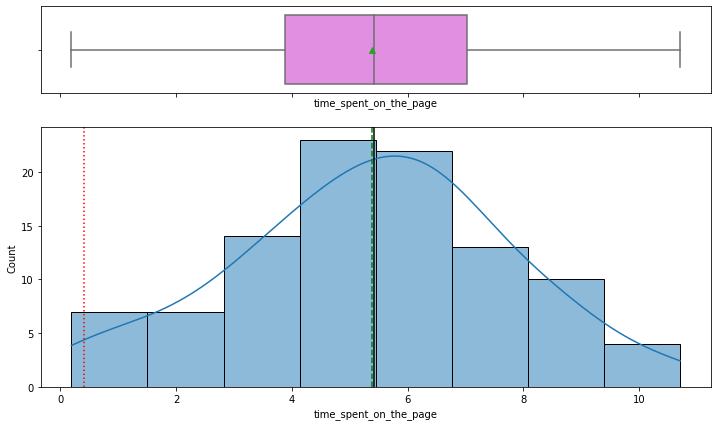

In [95]:
histogram_boxplot(df, 'time_spent_on_the_page',kde=True, bins='auto')

- The boxplot shows no outliers
- The data follows a normal distribution
- Mean, median and mode are seems too close each other

### Checking the categorical variables:


#### Landing Page

In [37]:
df.landing_page.value_counts()

new    50
old    50
Name: landing_page, dtype: int64

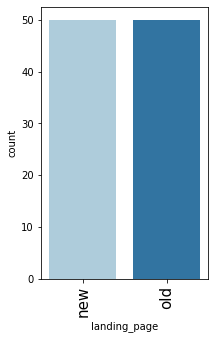

In [41]:
labeled_barplot(df,'landing_page')

#### Jonathan's Comments:

- Landing page has only two values "new" and "old"
- The observations are distributed equally with 50 for each one

In [38]:
df.group.value_counts()

control      50
treatment    50
Name: group, dtype: int64

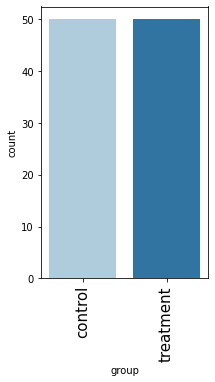

In [43]:
labeled_barplot(df,'group')

#### Jonathan's Comments:

- Group column has only two values "control" and "treatment"
- The observations are distributed equally with 50 for each one

In [39]:
df.converted.value_counts()

yes    54
no     46
Name: converted, dtype: int64

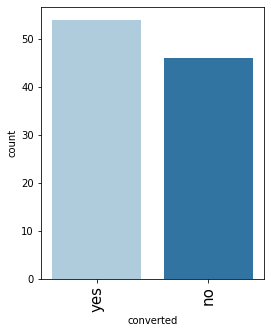

In [49]:
labeled_barplot(df,'converted')

#### Jonathan's Comments:

- Group column has only two values "yes" and "no"
- The frequency for yes is higher than for no (54 vs 46)

In [40]:
df.language_preferred.value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

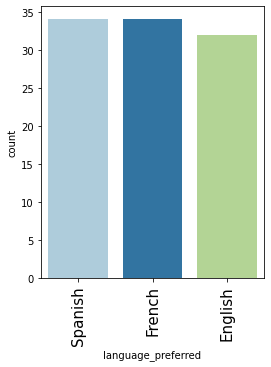

In [7]:
labeled_barplot(df,'language_preferred')

#### Jonathan's Comments:

- English language is the less preferred 


### Bivariate Analysis

In [8]:
df.corr()

,user_id,time_spent_on_the_page
user_id,1.000000,-0.372868
time_spent_on_the_page,-0.372868,1.000000


### Jonathan's Comments:
#### Since there is only one numerical variable is not possible use heatmaps or pairplots, the analysis will be done for each categorical variable against the only numerical variable

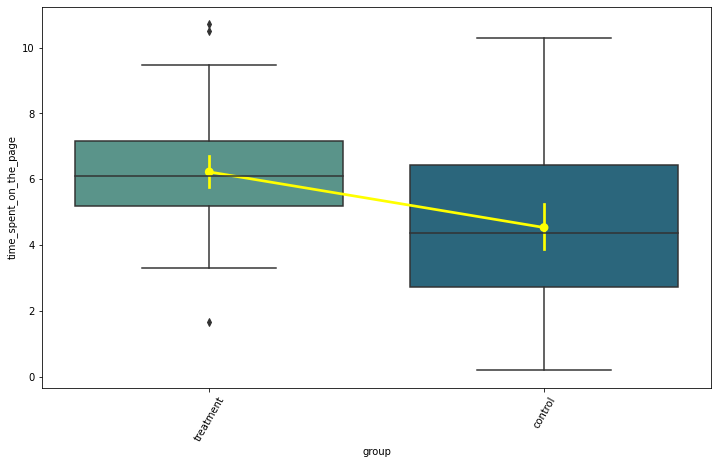

In [17]:
numVsCatPlot(df, 'time_spent_on_the_page', 'group')

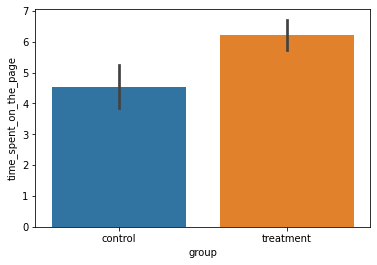

In [18]:
sns.barplot(data = df, x = 'group', y = 'time_spent_on_the_page');

In [19]:
df.groupby(['group'])['time_spent_on_the_page'].mean()

group
control      4.5324
treatment    6.2232
Name: time_spent_on_the_page, dtype: float64

### Jonathan's Comments:

#### - The treatment group spend more time on the page that control group in average


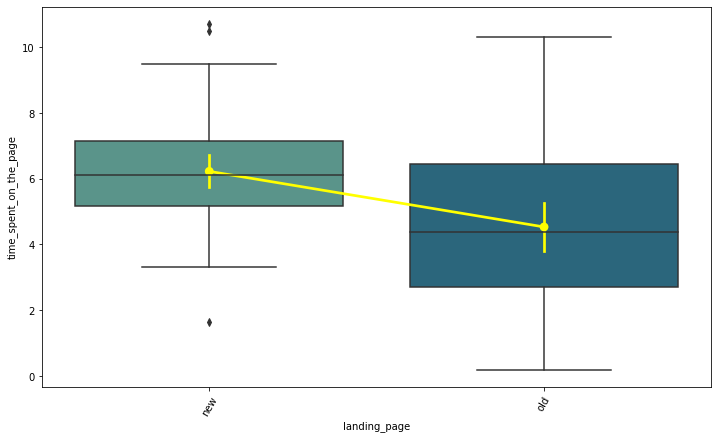

In [20]:
numVsCatPlot(df, 'time_spent_on_the_page', 'landing_page')

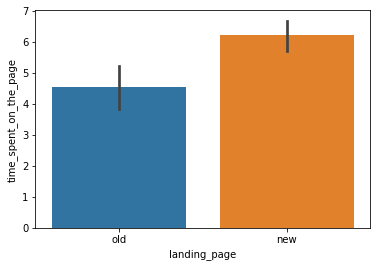

In [21]:
sns.barplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page');

In [22]:
df.groupby(['landing_page'])['time_spent_on_the_page'].mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

### Jonathan's Comments:

#### - The behavior is equal to the last one, users spend more time on new landing page than old one


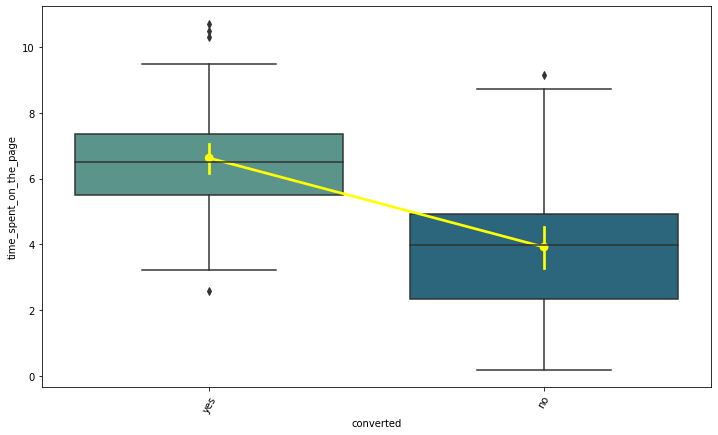

In [23]:
numVsCatPlot(df, 'time_spent_on_the_page', 'converted')

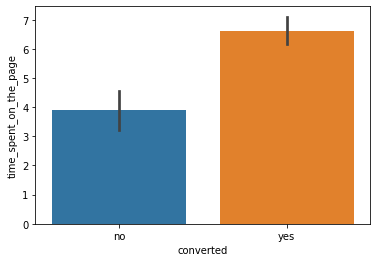

In [25]:
sns.barplot(data = df, x = 'converted', y = 'time_spent_on_the_page');

In [26]:
df.groupby(['converted'])['time_spent_on_the_page'].mean()

converted
no     3.915870
yes    6.623148
Name: time_spent_on_the_page, dtype: float64

### Jonathan's Comments:

#### - Those users that decided to be subscribers of new portal demonstrate on average spent more time on the page


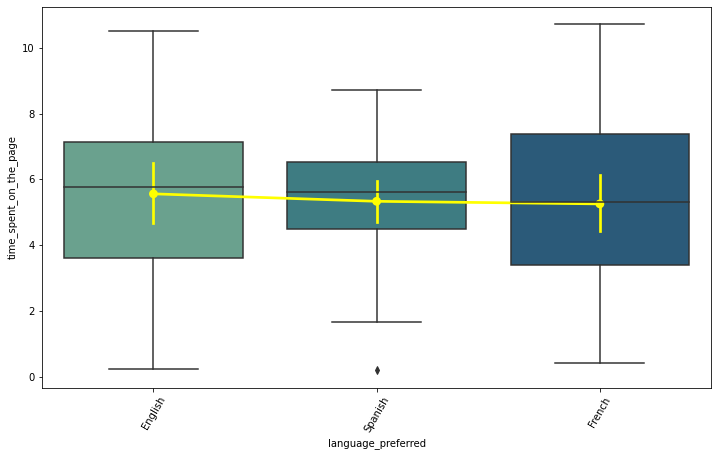

In [27]:
numVsCatPlot(df, 'time_spent_on_the_page', 'language_preferred')

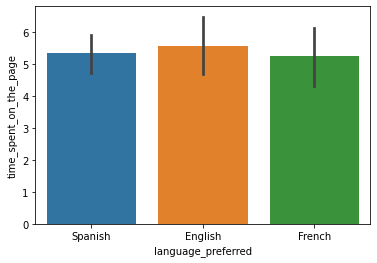

In [29]:
sns.barplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page');

In [30]:
df.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64

### Jonathan's Comments:

#### - The language preferred is English but really the difference between all languages  is not significant


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

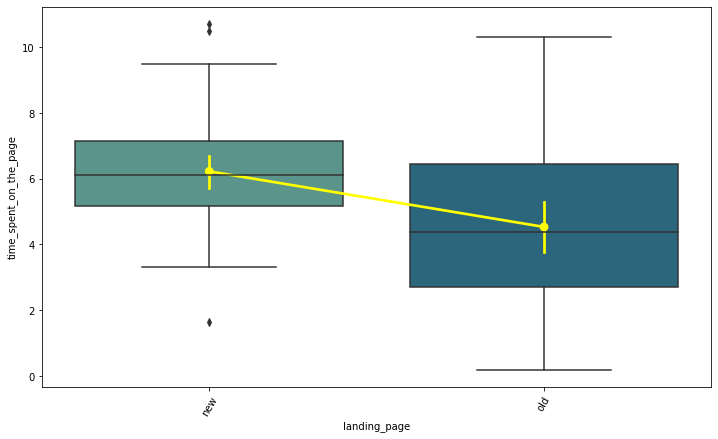

In [8]:
numVsCatPlot(df, 'time_spent_on_the_page', 'landing_page')

In [9]:
df.groupby(['landing_page'])['time_spent_on_the_page'].mean()

landing_page
new    6.2232
old    4.5324
Name: time_spent_on_the_page, dtype: float64

### Jonathan's Comments:

#### - On average users  spend more time on the new page than on the old page.


### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0:$ Null Hypothesis: The mean time spent on the new landing page is the same as the mean time spent on the old landing page. <br>
> $H_a:$ Alternate Hypothesis: The mean time spent on the new landing page is higher than the mean time spent on the old landing page.

means: <br>
$\mu1$: be the mean time spent on the new landing page <br>
$\mu2$: be the mean time spent on the old landing page

Mathematically, the above formulated hypotheses can be written as:

>$H_0: \mu1 = \mu2 $ <br>
$H_a: \mu1 > \mu2 $

### Step 2: Select Appropriate test

Analysis for select appropiate test:<br>

- Since the alternate hypothesis wants to check if one mean is GREATHER THAN the test we should perform a one-side test
- Two samples are not independent 
- The population standard deviations are unknown

Conclusion:

- We will use a paired t-test for this problem.


### Step 3: Decide the significance level

As given in the problem statement, we select  = 0.05

### Step 4: Collect and prepare data

In [38]:
u1 = df[df['landing_page']=='new']['time_spent_on_the_page']
u2 = df[df['landing_page']=='old']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [15]:
# find the p-value
test_stat, p_value  = stats.ttest_rel(u1, u2, alternative = 'greater')  #Performing a paired t-test

print('The p-value is', p_value)

The p-value is 0.00029910900937037973


### Step 6: Compare the p-value with $\alpha$

In [16]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.00029910900937037973 is less than the level of significance, we reject the null hypothesis.


In [20]:
p_value_perc = p_value * 100
p_value_perc

0.029910900937037972

### Step 7:  Draw inference

Given a significance level of 5% and with the p-value of 0.02 % we have enough statistical evidence to reject the null hypothesis and confirm that the users spent more time on new landing page

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0:$ Null Hypothesis: The conversion rate (the proportion of users who visit the landing page and get converted) for the new page is the same as the conversion rate for the old page. <br>
> $H_a:$ Alternate Hypothesis: The conversion rate for the new page is greater than the conversion rate for the old page.


Let p1 and p2 be the conversion rates for the new and old landing pages.
>$H_0: p1 = p2 $ <br>
$H_a: p1 > p2 $

### Step 2: Select Appropriate test

#### Checking the number of users converted:

In [22]:
df.groupby(['landing_page'])['converted'].value_counts()

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: converted, dtype: int64

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomally distributed population - Yes, a product is either defective or non-defective.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

#### Conclusion: Since the statement talk about "proportions" and the z-test assumptions are satisfied we will use the two proportion z-test

### Step 3: Decide the significance level

As given in the problem statement, we select  = 0.05

### Step 4: Calculate the p-value

In [4]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest
# find the p-value
test_stat, p_value = proportions_ztest(count = [33, 21], nobs = [50, 50], value = 0, alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 5: Compare the p-value with $\alpha$

In [5]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 6:  Draw inference:

Given a significance level of 5% and with the p-value of 99 % we have enough statistical evidence to fail to reject the null hypothesis so,  The conversion rate for the new page is greater than the conversion rate for the old page.

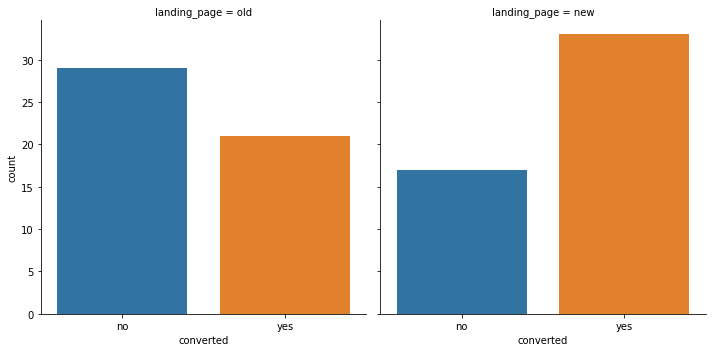

In [36]:
sns.catplot(data = df, x = 'converted', col = 'landing_page', kind = 'count');

## 3. Is the conversion and preferred language are independent or related?

### Step 1: Define the null and alternate hypotheses

The null and alternative hypotheses can be formulated as:

> $H_0:$ Is the conversion and preferred language are independent. <br>
> $H_a:$ Is the conversion and preferred language are not independent.


### Step 2: Select Appropriate test

As we need to check the independence between conversion and language he test selected is the Chi Square Test for Independence and check the data for those two variables:

In [48]:
df.groupby(['language_preferred'])['converted'].value_counts()

language_preferred  converted
English             yes          21
                    no           11
French              no           19
                    yes          15
Spanish             yes          18
                    no           16
Name: converted, dtype: int64

For this kind of test we need to build a contingency table, I've researched on Internet (https://www.geeksforgeeks.org/contingency-table-in-python/) and the way to build the contingency table is a show below:

In [50]:
c_table = pd.crosstab(df['converted'], df['language_preferred'])
c_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 3: Calculate the p-value

In [55]:
# import the required function
from scipy.stats import chi2_contingency
chi, p_value, dof, expected = chi2_contingency(c_table)

print('The p-value is', p_value)


The p-value is 0.21298887487543447


### Step 4: Compare the p-value with $\alpha$

In [57]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 5:  Draw inference:

Given a significance level of 5% and with the p-value of 21 % we have enough statistical evidence to fail to reject the null hypothesis, so the conversion and preferred language are independent.

## 4. Is the time spent on the new page same for the different language users?

### Step 1: Define the null and alternate hypotheses

Let the means as show below

$\mu1$: be the mean time spent when a user choose English as preferred language<br>
$\mu2$: be the mean time spent when a user choose Spanish as preferred language<br>
$\mu3$: be the mean time spent when a user choose French as preferred language<br>


The null and alternative hypotheses can be formulated as:

> $H_0:$ $\mu1$ = $\mu2$ = $\mu3$ <br>
> $H_a:$ at least one of these means if not the same


### Step 2: Select Appropriate test

language_preferred
English    5.559062
French     5.253235
Spanish    5.331765
Name: time_spent_on_the_page, dtype: float64


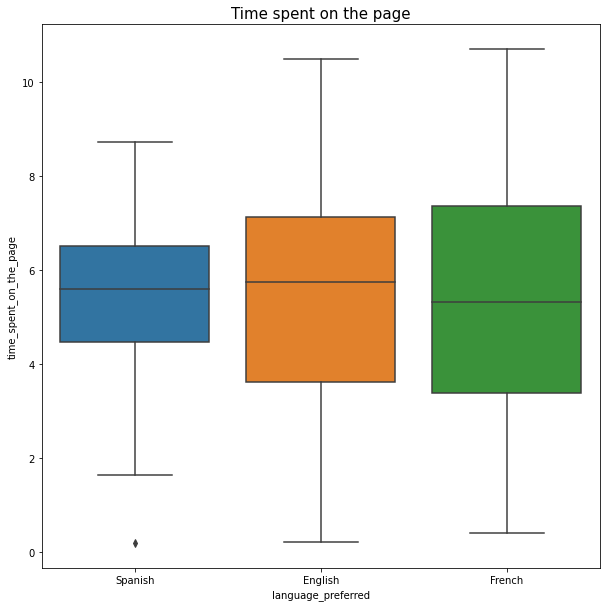

In [92]:
print(df.groupby("language_preferred")["time_spent_on_the_page"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (10,10))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = df)
a.set_title("Time spent on the page", fontsize=15)
plt.show()

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spent on the page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the page does not follow a normal distribution

In [65]:
# find the p-value
w, p_value = stats.shapiro(df['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.5643684267997742


In [72]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.5643684267997742 is greater than the level of significance, we fail to reject the null hypothesis.


#### Insight: The time spent of the page follow a normal distribution

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [74]:
from scipy.stats import levene
statistic, p_value = levene( df['time_spent_on_the_page'][df['language_preferred']=="English"], 
                             df['time_spent_on_the_page'][df['language_preferred']=="French"], 
                             df['time_spent_on_the_page'][df['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


In [75]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.06515086840327314 is greater than the level of significance, we fail to reject the null hypothesis.


#### Insight: The homogeneity of variances is verified

### Let's test whether the assumptions are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.


 ### One-way ANOVA Test

In [93]:
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df.loc[df['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df.loc[df['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.8665610536012648


### Step 3: Compare the p-value with $\alpha$

In [94]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.8665610536012648 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 4:  Draw inference:

Given a significance level of 5% and with the p-value of 86 % we have enough statistical evidence to fail to reject the null hypothesis and say that is not possible to say that at least  one time average on the new landing page is different 

## Conclusion and Business Recommendations

* Design and create the new landing page was a correct decision from business standpoint, since the user spent more time on the new landing page


___